 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [10]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [11]:
whale_csvpath=Path("./Resources/whale_returns.csv")

Whale_returns=pd.read_csv(whale_csvpath,index_col="Date", parse_dates=True, infer_datetime_format=True)

Whale_returns.sort_index(ascending = True, inplace = True)

In [12]:
Whale_returns=Whale_returns.drop_duplicates().copy()


In [13]:
# Reading whale returns
Whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [14]:
# Count nulls
# Whale_returns=Whale_returns.isnull().sum()
# Whale_returns
Whale_returns.isnull().mean() * 100
Whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [15]:
# Drop nulls
Whale_returns=Whale_returns.dropna()


In [16]:
# Validate no more missing values
Whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [17]:
# Reading algorithmic returns
Algorithmic_csvpath=Path("./Resources/algo_returns.csv")

Algorithmic=pd.read_csv(Algorithmic_csvpath,index_col="Date", parse_dates=True, infer_datetime_format=True)

Algorithmic.sort_index(ascending = True, inplace = True)

In [18]:
# Count nulls
Algorithmic.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [19]:
# Drop nulls
Algorithmic=Algorithmic.dropna()
Algorithmic.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P TSX 60 Closing Prices
SP_TSX_path = Path("./Resources/sp_tsx_history.csv")
SP_TSX=pd.read_csv(SP_TSX_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
SP_TSX.sort_index(ascending = True, inplace = True)

In [21]:
# Check Data Types
SP_TSX.dtypes

Close    object
dtype: object

In [22]:
# Fix Data Types
SP_TSX["Close"]=SP_TSX["Close"].str.replace("$", "")
SP_TSX["Close"]=SP_TSX["Close"].str.replace(",", "")

# SP_TSX.dtypes
SP_TSX["Close"]

C:\Users\Emmae\AppData\Local\Temp\ipykernel_1180\3595065412.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  SP_TSX["Close"]=SP_TSX["Close"].str.replace("$", "")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [23]:
SP_TSX["Close"] = SP_TSX["Close"].astype("float")
SP_TSX.dtypes

Close    float64
dtype: object

In [24]:
# Calculate Daily Returns
SP_Daily_Returns=SP_TSX.pct_change()
SP_Daily_Returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [25]:
# Drop nulls
SP_Daily_Returns.dropna(inplace = True)

SP_Daily_Returns.isnull().sum()

Close    0
dtype: int64

In [26]:
# Rename `Close` Column to be specific to this portfolio.
SP_Daily_Returns.rename(columns ={"Close":"SP TSX Return"}, inplace=True)
SP_Daily_Returns.head()

,SP TSX Return
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df_daily=pd.concat([Whale_returns, Algorithmic, SP_Daily_Returns],axis="columns",join="inner")
df_daily.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

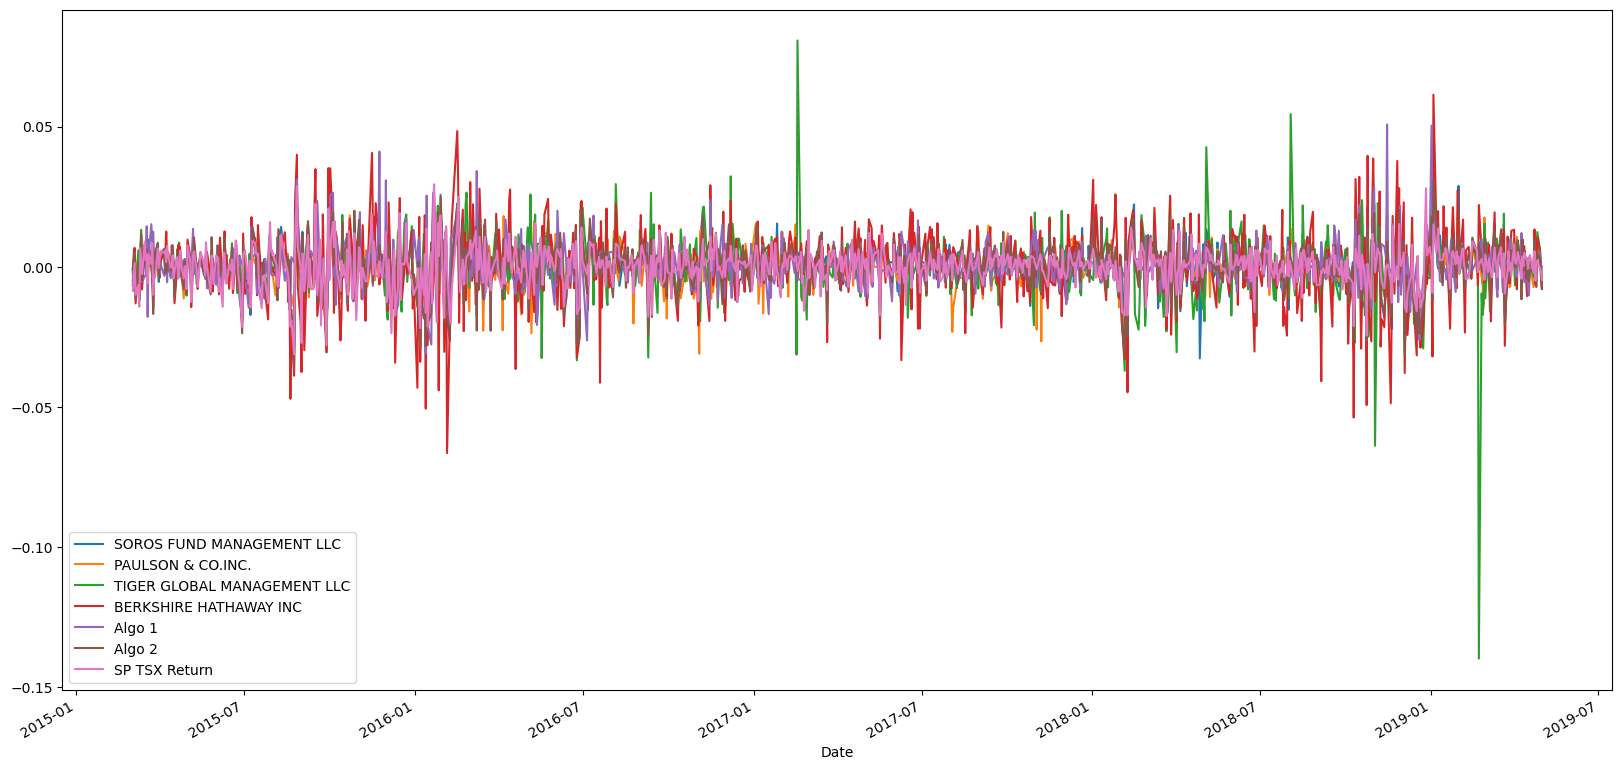

In [28]:
# Plot daily returns of all portfolios
df_daily.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

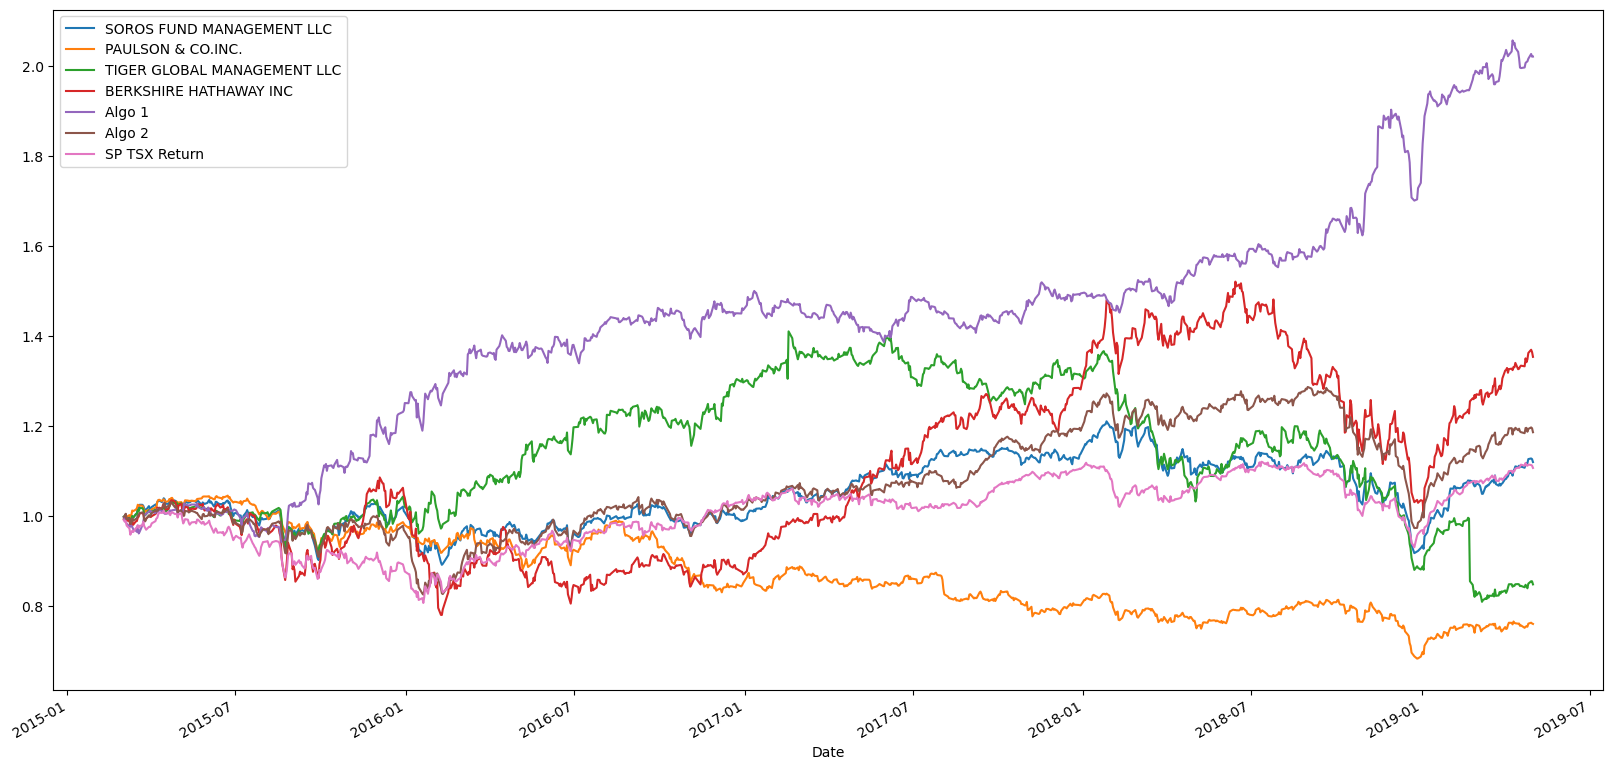

In [29]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

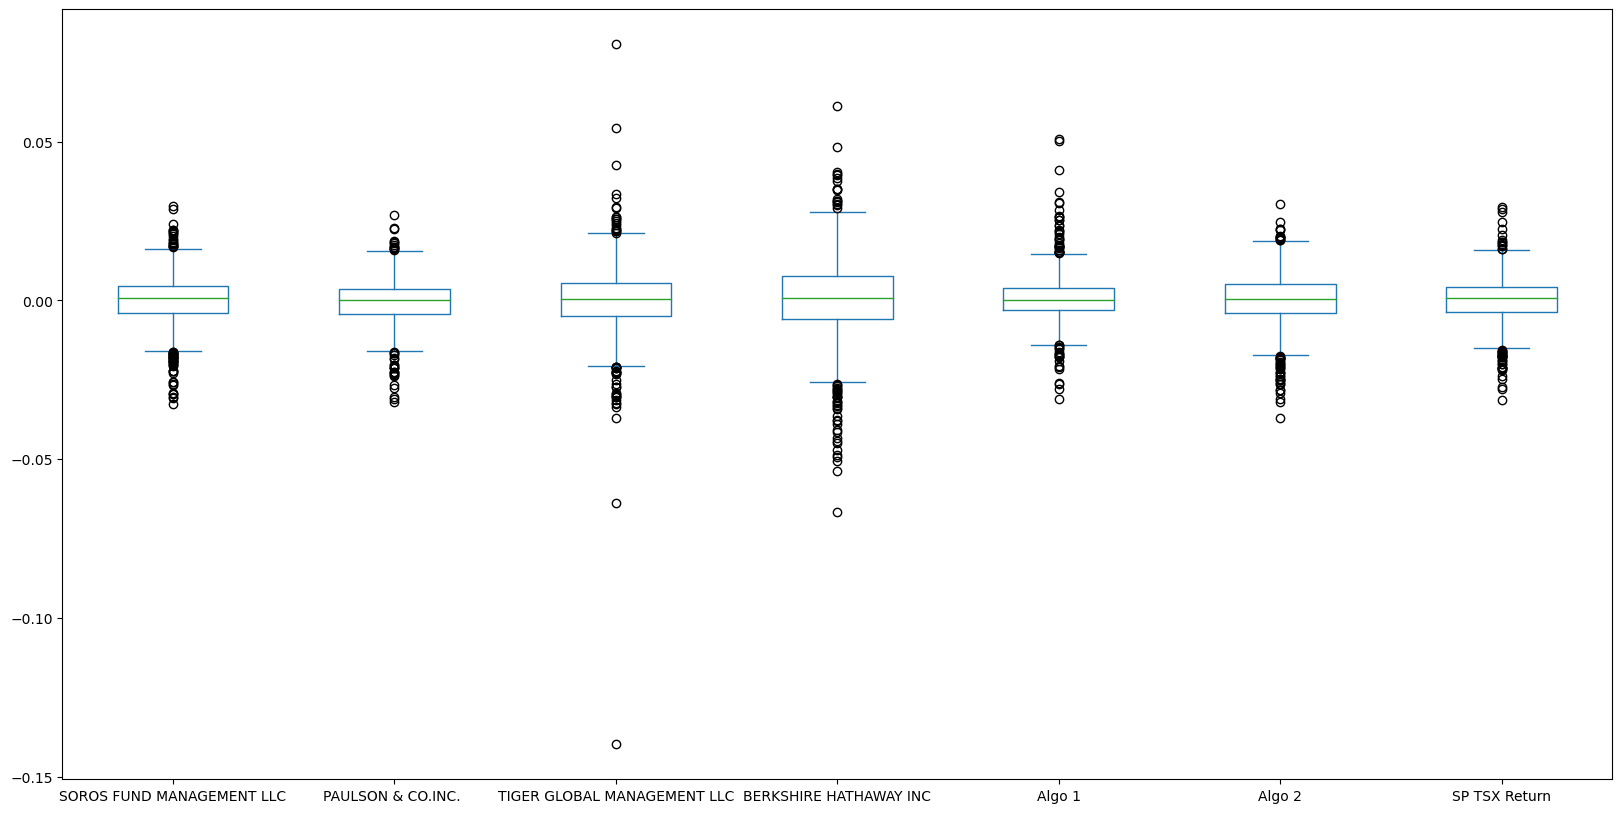

In [30]:
# Box plot to visually show risk
df_daily.plot(kind="box", figsize=(20,10))

### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios

df_daily_std=df_daily.std()
df_daily_std

SOROS FUND MANAGEMENT LLC      0.007936
PAULSON & CO.INC.              0.007079
TIGER GLOBAL MANAGEMENT LLC    0.011034
BERKSHIRE HATHAWAY INC         0.013004
Algo 1                         0.007640
Algo 2                         0.008299
SP TSX Return                  0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [32]:
# Calculate  the daily standard deviation of S&P TSX 60

df_daily_std = pd.DataFrame(df_daily.std()).rename(columns={0:"std"})
df_daily_std
    

,std
SOROS FUND MANAGEMENT LLC,0.007936
PAULSON & CO.INC.,0.007079
TIGER GLOBAL MANAGEMENT LLC,0.011034
BERKSHIRE HATHAWAY INC,0.013004
Algo 1,0.007640
Algo 2,0.008299
SP TSX Return,0.007023


In [33]:
# Determine which portfolios are riskier than the S&P TSX 60

Higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["SP TSX Return", "std"]]
Higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007936
PAULSON & CO.INC.,0.007079
TIGER GLOBAL MANAGEMENT LLC,0.011034
BERKSHIRE HATHAWAY INC,0.013004
Algo 1,0.007640
Algo 2,0.008299


### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = df_daily_std * np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125986
PAULSON & CO.INC.,0.112380
TIGER GLOBAL MANAGEMENT LLC,0.175161
BERKSHIRE HATHAWAY INC,0.206427
Algo 1,0.121282
Algo 2,0.131741
SP TSX Return,0.111480


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

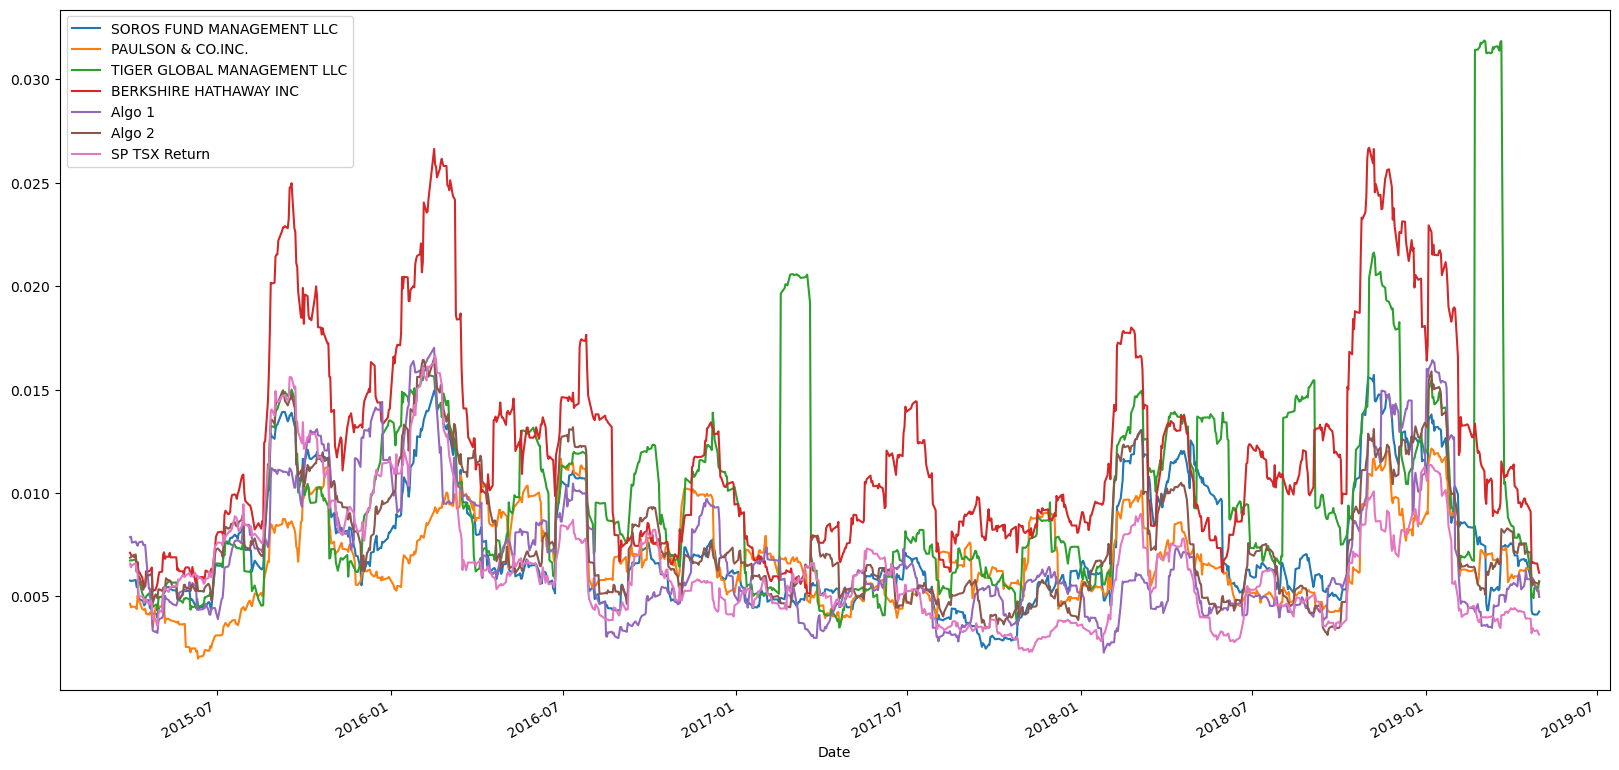

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling = df_daily.rolling(window=21).std()
# Plot the rolling standard deviation
all_rolling.plot(figsize=(20,10))

### Calculate and plot the correlation

In [36]:
# Calculate the correlation
correlation = pd.DataFrame(all_rolling.corr()).loc[:, "SP TSX Return"]

# Display de correlation matrix
correlation[correlation==correlation[correlation<1].max()]


Algo 2    0.862257
Name: SP TSX Return, dtype: float64

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60D Beta BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

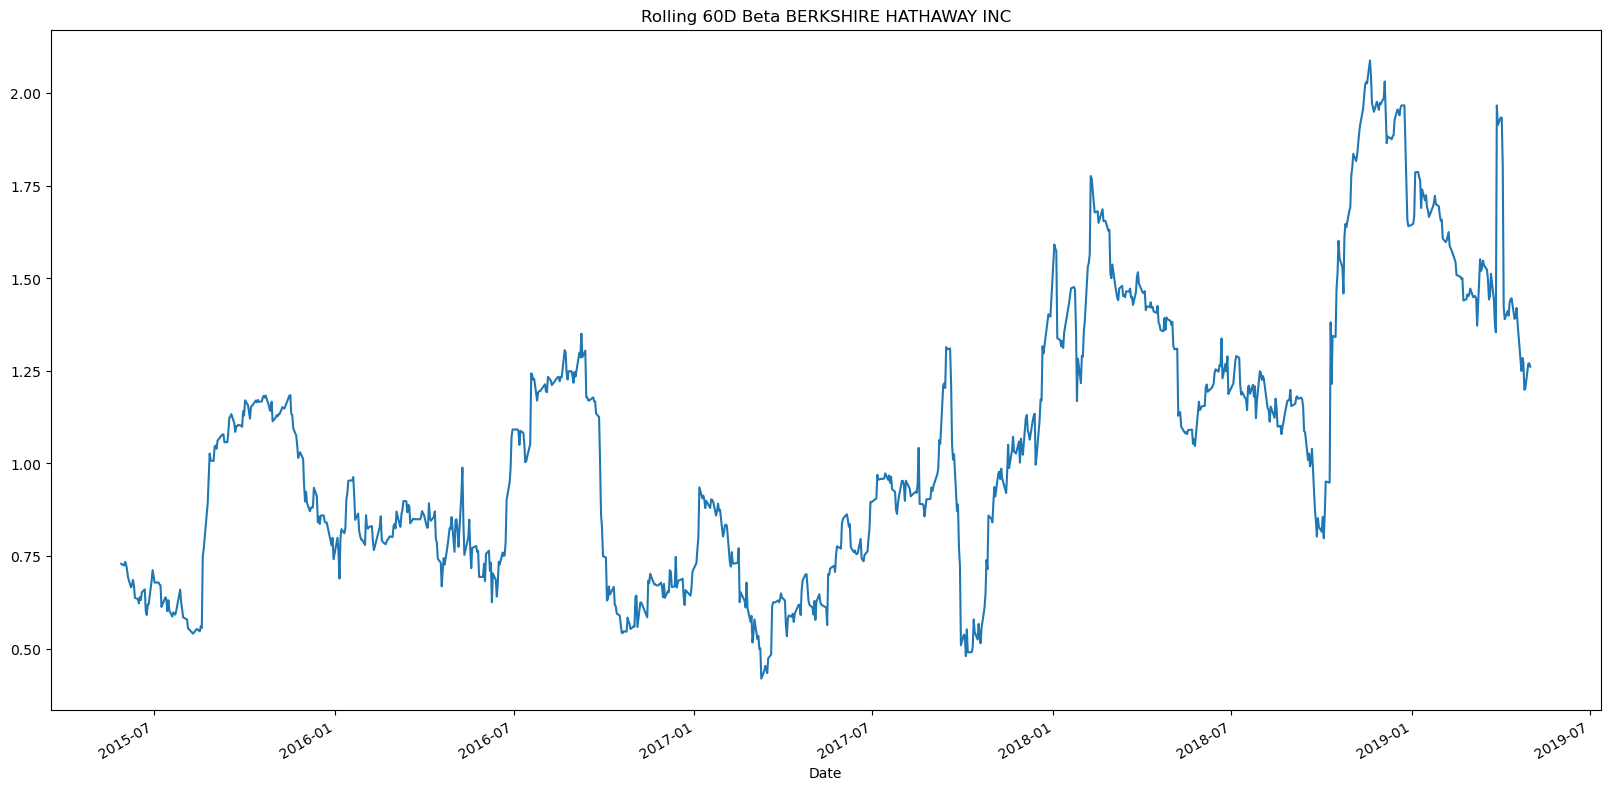

In [37]:
# Calculate covariance of a single portfolio
rolling_covariance = df_daily['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_daily['SP TSX Return'])
# Calculate variance of S&P TSX
rolling_variance = df_daily['SP TSX Return'].rolling(window=60).var()
# Computing beta
beta=rolling_covariance/rolling_variance
# Plot beta trend
beta.plot(figsize=(20,10), title='Rolling 60D Beta BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

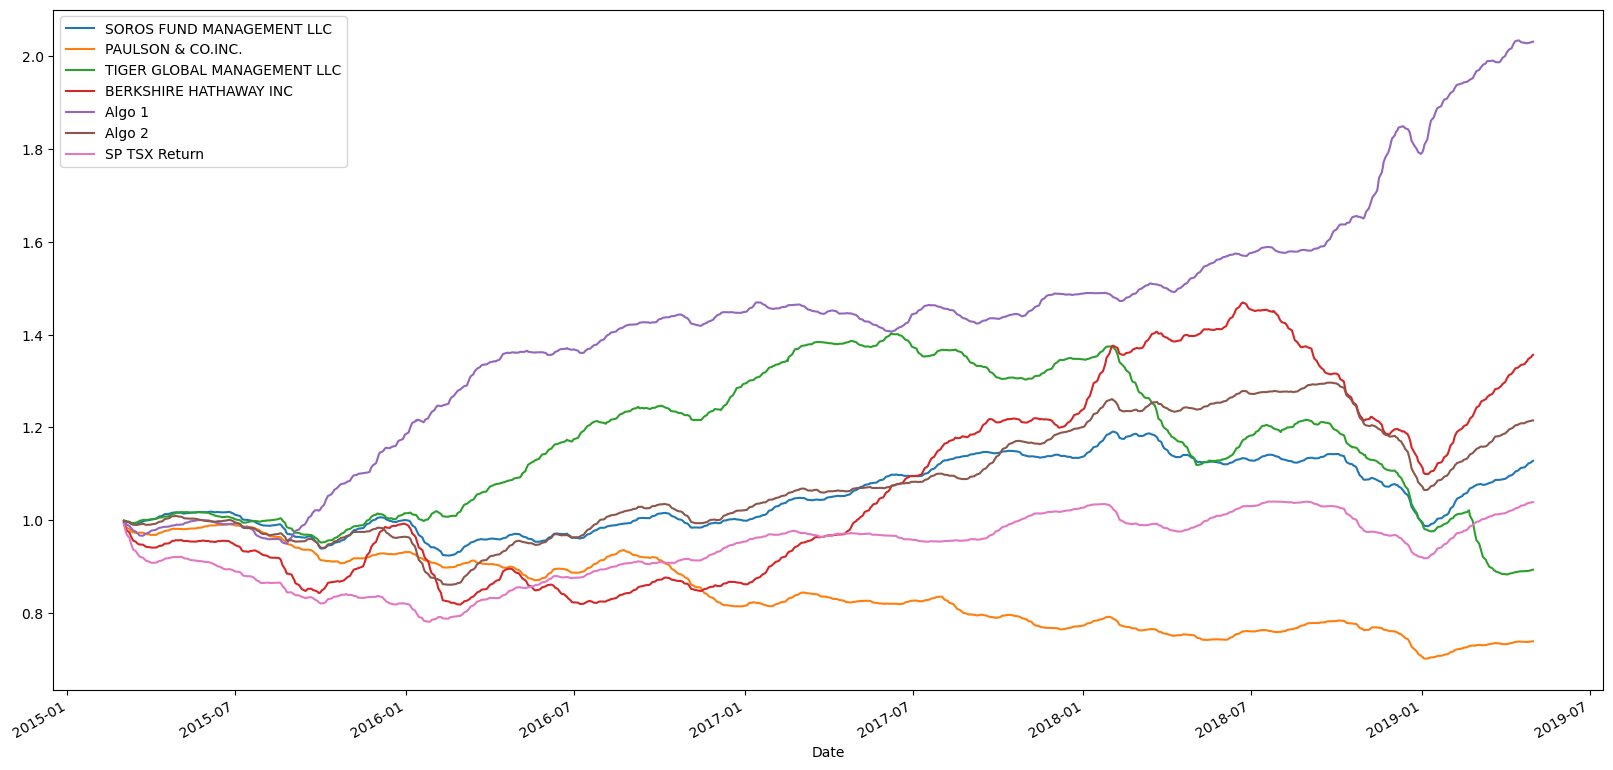

In [38]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = df_daily.ewm(span=21, adjust=False).mean()
(1+df_daily_ewm).cumprod().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
sharpe_ratios = df_daily.mean()*252/ (df_daily.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.290688
PAULSON & CO.INC.             -0.555201
TIGER GLOBAL MANAGEMENT LLC   -0.146460
BERKSHIRE HATHAWAY INC         0.473532
Algo 1                         1.521602
Algo 2                         0.393500
SP TSX Return                  0.286526
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

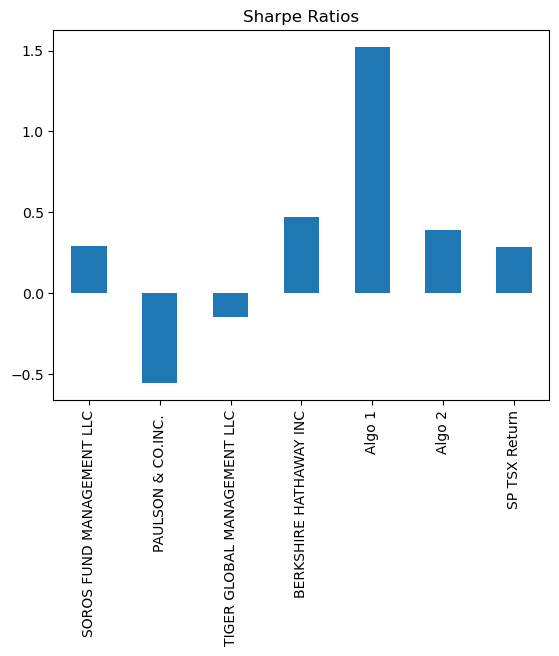

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo1 and Algo2 both outperformed the market. Algo1 and Algo2 outperformed all Whales portfolios except Algo2 is lower than 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
# Reading data from 1st stock
l_csvpath=Path("./Resources/l_historical.csv")

l_returns=pd.read_csv(l_csvpath,index_col="Date", parse_dates=True, infer_datetime_format=True)

l_returns.sort_index(ascending = True, inplace = True)

l_returns.rename(columns = {"Close": "l"}, inplace = True)

In [61]:
# Reading data from 2nd stock
otex_csvpath=Path("./Resources/otex_historical.csv")

otex_returns=pd.read_csv(otex_csvpath,index_col="Date", parse_dates=True, infer_datetime_format=True)

otex_returns.sort_index(ascending = True, inplace = True)

otex_returns.rename(columns = {"Close":"otex"}, inplace = True)

In [62]:
# Reading data from 3rd stock
shop_csvpath=Path("./Resources/shop_historical.csv")

shop_returns=pd.read_csv(shop_csvpath,index_col="Date", parse_dates=True, infer_datetime_format=True)

shop_returns.sort_index(ascending = True, inplace = True)

shop_returns.rename(columns = {"Close":"shop"}, inplace = True)

In [90]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([l_returns,otex_returns,shop_returns], axis = "columns", join = "inner")
my_stocks.head()

,Symbol,l,Symbol,otex,Symbol,shop
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [91]:
# Reset Date index
my_stocks.index = my_stocks.index.normalize()

In [92]:
# Reorganize portfolio data by having a column per symbol
my_stocks.drop(my_stocks.columns[[0]], axis=1, inplace=True)
my_stocks.head()

,l,otex,shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [98]:
# Calculate daily returns
daily_returns = my_stocks.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,l,otex,shop
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [103]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio = daily_returns.dot(weights)
my_portfolio.pct_change()
my_portfolio.dropna(inplace=True)
# Display sample data
my_portfolio.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [173]:
# Join your returns DataFrame to the original returns DataFrame
all_df = pd.concat((my_portfolio,df_daily), axis = "columns", join = "inner")
all_df.rename(columns = {0:"my_portfolio"}, inplace=True)


In [174]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_df.dropna(inplace=True)
all_df

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Return
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [204]:
# Calculate the annualized `std`
all_std = pd.DataFrame(all_df.std()).rename(columns = {0:"std"})

all_std.std()*np.sqrt(252)

all_std

,std
my_portfolio,0.014208
SOROS FUND MANAGEMENT LLC,0.009262
PAULSON & CO.INC.,0.007270
TIGER GLOBAL MANAGEMENT LLC,0.013976
BERKSHIRE HATHAWAY INC,0.014461
Algo 1,0.007608
Algo 2,0.008716
SP TSX Return,0.006280


In [208]:
higher_std = all_std[all_std["std"] > all_std.loc["SP TSX Return", "std"]]
higher_std

,std
my_portfolio,0.014208
SOROS FUND MANAGEMENT LLC,0.009262
PAULSON & CO.INC.,0.007270
TIGER GLOBAL MANAGEMENT LLC,0.013976
BERKSHIRE HATHAWAY INC,0.014461
Algo 1,0.007608
Algo 2,0.008716


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

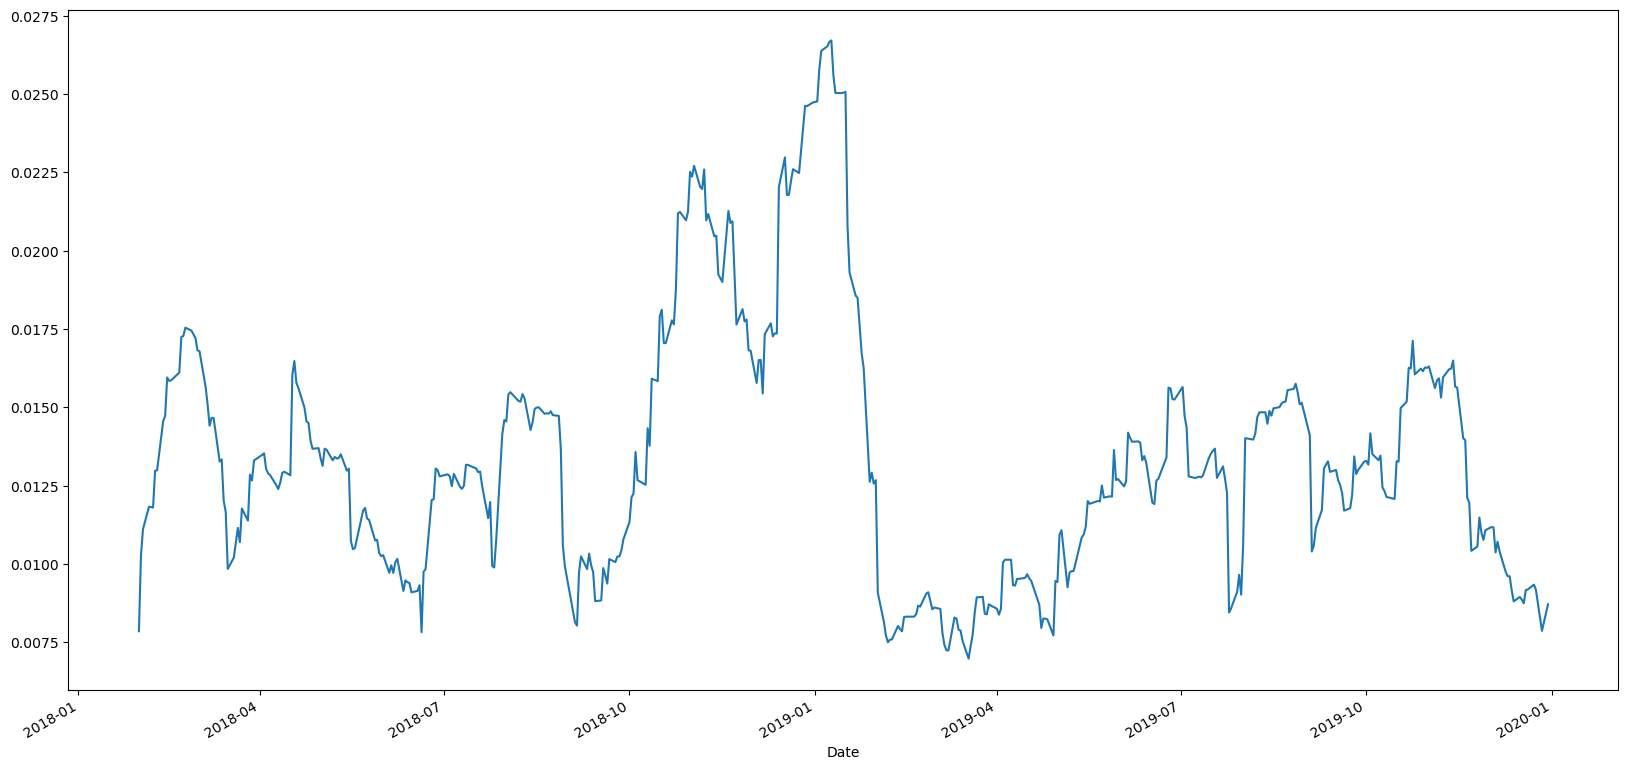

In [180]:
# Calculate rolling standard deviation
rolling_std = my_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

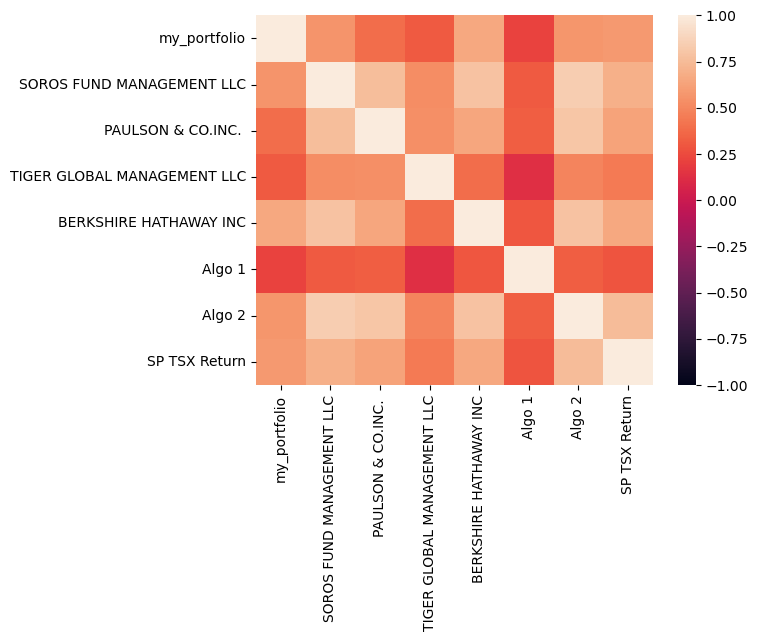

In [188]:
# Calculate and plot the correlation
import seaborn as sns
all_corr = all_df.corr()
sns.heatmap(all_corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

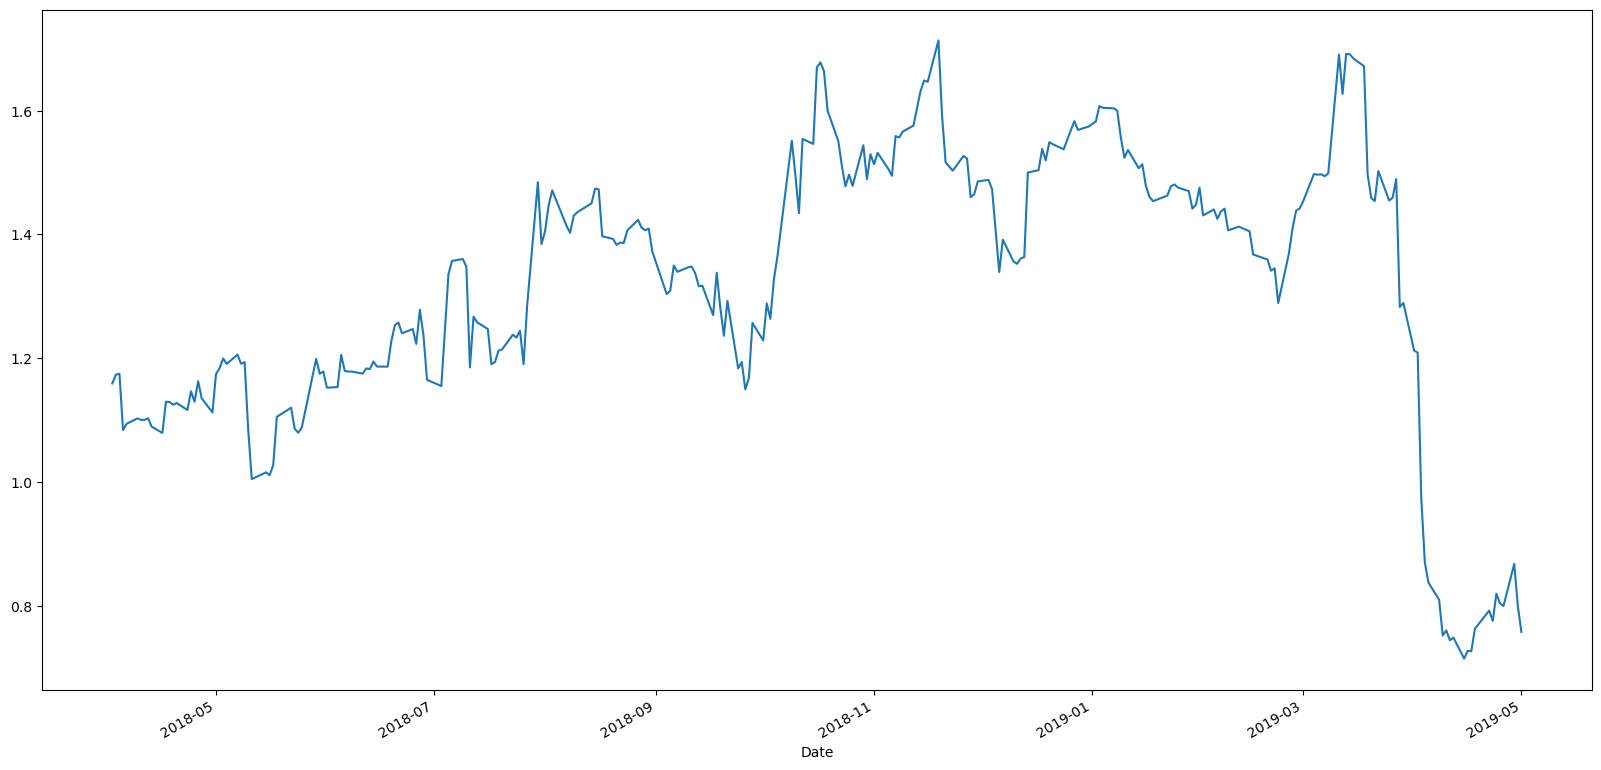

In [209]:
# Calculate and plot Beta

my_portfolio_var = all_df['SP TSX Return'].rolling(window=60).var()
my_portfolio_cov = all_df['my_portfolio'].rolling(window=60).cov(all_df['SP TSX Return'])

my_beta = my_portfolio_cov/ my_portfolio_var
my_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [210]:
# Calculate Annualized Sharpe Ratios
Sharpe_Ratios = all_df.mean()*252/(all_df.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

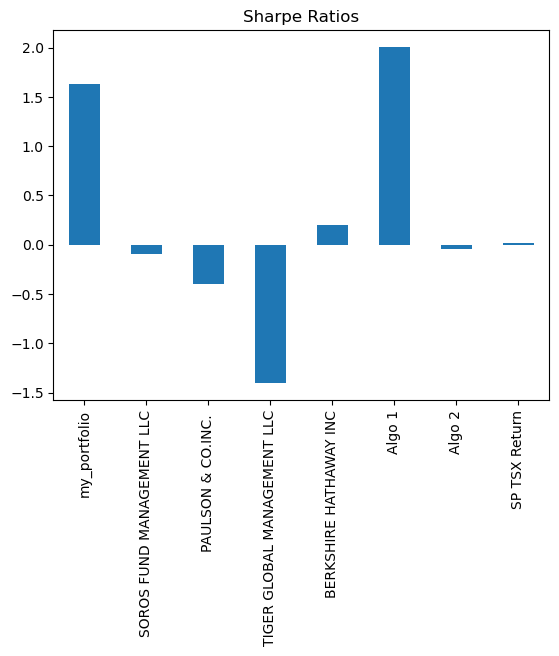

In [212]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

My portfolio is top 2 stock, top 1 stock in the list is Algo 1.